In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
A = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]

B = [1,1,1,1,1,0,
     1,0,0,0,0,1,
     1,1,1,1,1,0,
     1,0,0,0,0,1,
     1,1,1,1,1,0]

C = [0,1,1,1,1,1,
     1,0,0,0,0,0,
     1,0,0,0,0,0,
     1,0,0,0,0,0,
     0,1,1,1,1,1]

In [31]:
x = np.array([A, B, C])
y = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

In [32]:
input_size = 30
hidden_size = 10
output_size = 3
learning_rate = 0.1
epochs = 1000

In [33]:
np.random.seed(30)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [34]:
def sigmoid(x):
    return 1 / ( 1 + np.exp( -x ) )

def sigmoid_derivative(x):
    return x * ( 1 - x )

In [35]:
def forward_propagation(X):
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

In [36]:
def computed_loss (y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [37]:
def back_propagation (x, y, z1, a1, z2, a2):
    global W1, b1, W2, b2

    #Output Layer error
    error_output = a2 - y
    delta_output = error_output *sigmoid_derivative(a2)

    #Hidden layer error
    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    #Update weights and biases
    W2 -= learning_rate *np.dot(a1.T, delta_output)
    b2 -= learning_rate *np.sum(delta_output, axis = 0, keepdims=True)
    W1 -= learning_rate *np.dot(x.T, delta_hidden)
    b1 -= learning_rate *np.sum(delta_hidden, axis = 0, keepdims=True)

In [38]:
losses = []
for epoch in range (epochs):
    z1,a1,z2,a2 = forward_propagation(x)
    loss = computed_loss(y, a2)
    losses.append(loss)
    back_propagation(x, y, z1,a1,z2,a2)


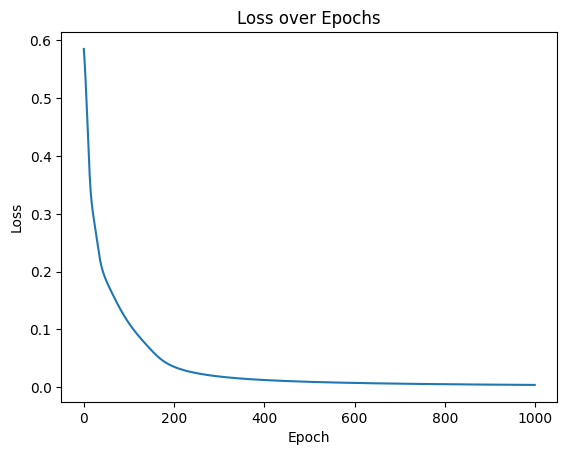

In [39]:
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [40]:
def predict(image):
    _, _, _, output = forward_propagation(image.reshape(1,-1))
    prediction = np.argmax(output, axis=1)
    labels = ['A','B','C']
    plt.imshow(image.reshape(5, 6), cmap ='gray')
    plt.title(f"Predicted:{labels[prediction[0]]}")
    plt.show()

Testing Predictions


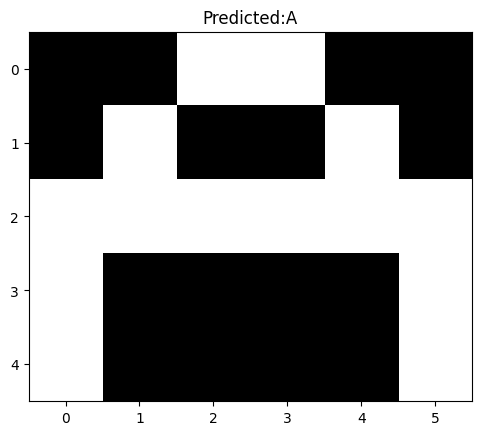

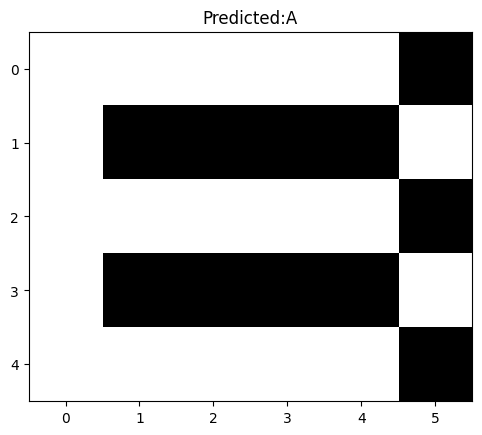

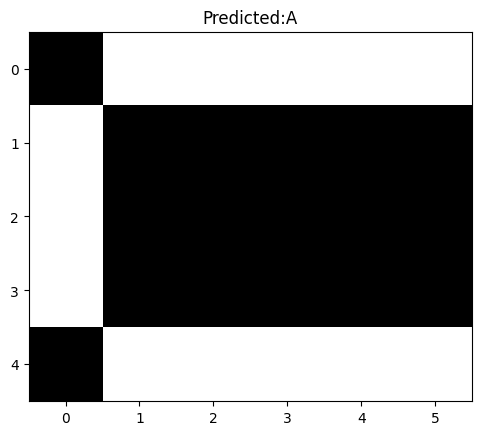

In [41]:
print("Testing Predictions")
predict(np.array(A))
predict(np.array(B))
predict(np.array(C))